<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/codsoft_Task_2_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Try different encodings (utf-8, latin1, ISO-8859-1)
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

file_path = '/content/IMDb Movies India.csv'

for encoding in encodings:
    try:
        tda = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded the data with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to load with encoding: {encoding}")

# Display the first few rows
tda.head()

Failed to load with encoding: utf-8
Successfully loaded the data with encoding: latin1


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(tda.info())
print(tda.describe())
print(tda.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)

In [ ]:
# Extract numerical values from 'Year' and convert to numeric
tda['Year'] = pd.to_numeric(tda['Year'].str.extract('(\d+)', expand=False), errors='coerce')

# Drop rows with missing values in 'Year' and 'Genre' after extraction
tda.dropna(subset=['Year'], inplace=True)
tda.dropna(subset=['Genre'], inplace=True)
tda.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
# Convert 'Votes' and 'Rating' to numeric format
tda['Votes'] = pd.to_numeric(tda['Votes'].str.replace(',', ''), errors='coerce')
tda['Rating'] = pd.to_numeric(tda['Rating'], errors='coerce')

# Fill missing values
tda['Rating'].fillna(tda['Rating'].mean(), inplace=True)
tda['Votes'].fillna(tda['Votes'].median(), inplace=True)

# Display the first few rows
tda.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",5.839568,57.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,5.839568,57.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147 min,"Comedy, Drama, Musical",4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
# Extract numerical values from 'Duration' and convert to numeric
tda['Duration'] = pd.to_numeric(tda['Duration'].str.extract('(\d+)', expand=False), errors='coerce')


In [ ]:
tda.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [ ]:
# Explode the 'Genre' column to separate rows
tda = tda.explode('Genre')


In [ ]:
print('Null Values in Year Column',tda ['Year'].isnull().sum())
print('Null Values in Genre Column',tda ['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [ ]:

print(tda.describe())

               Year     Duration        Rating          Votes
count  11086.000000  6445.000000  11086.000000   11086.000000
mean    1991.656233   131.110784      5.820178    1401.516688
std       21.810875    26.571492      1.129806    9842.597858
min     1917.000000    21.000000      1.100000       5.000000
25%     1976.000000   115.000000      5.400000      31.000000
50%     1995.000000   133.000000      5.839568      57.000000
75%     2011.000000   149.000000      6.400000     151.000000
max     2022.000000   321.000000     10.000000  591417.000000


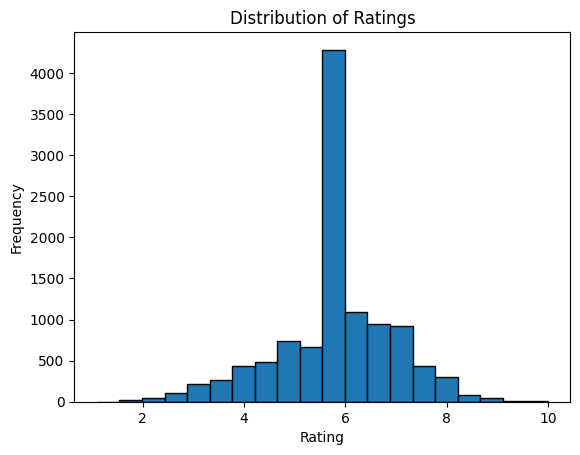

In [ ]:
# Histogram for 'Rating'
plt.hist(tda['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

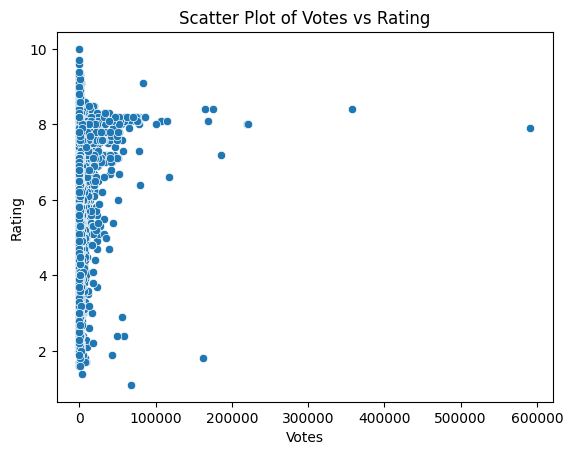

In [ ]:
# Scatter plot for 'Votes' vs 'Rating'
sns.scatterplot(x='Votes', y='Rating', data=tda)
plt.title('Scatter Plot of Votes vs Rating')
plt.show()

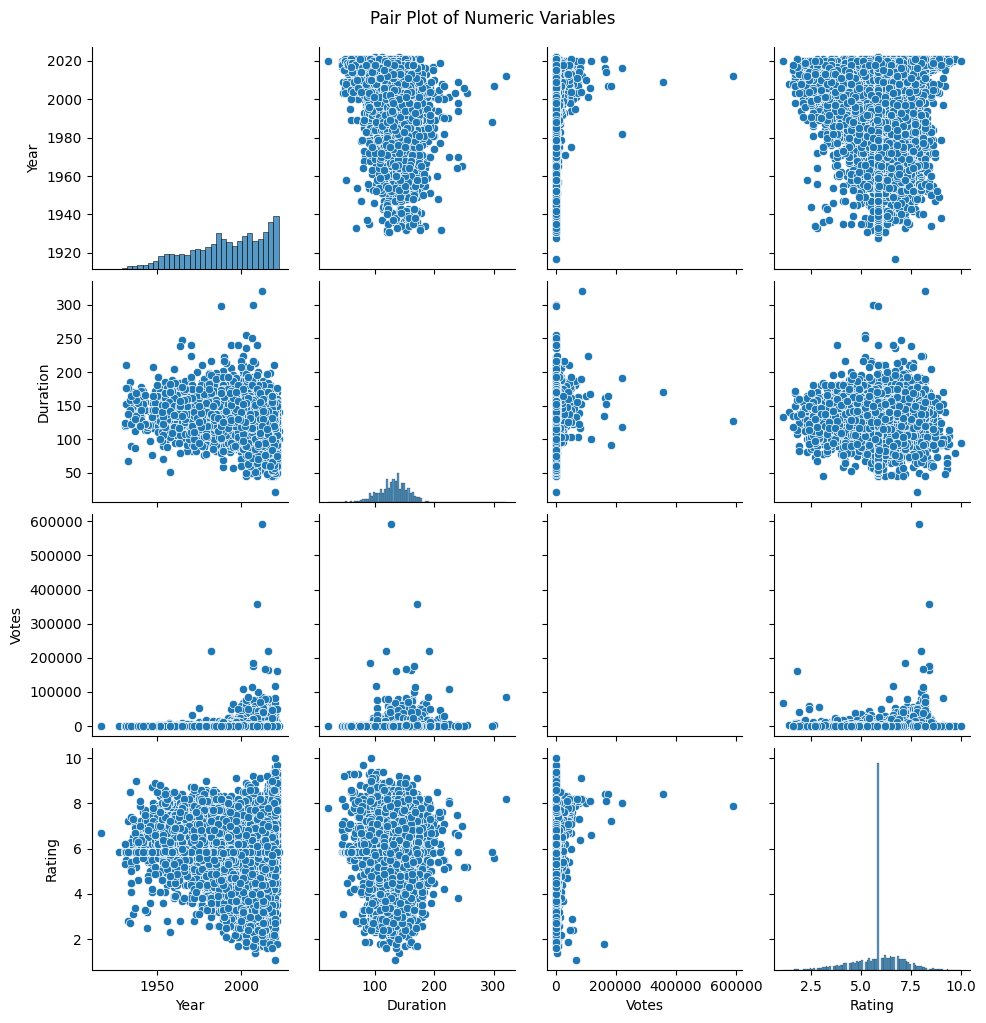

In [ ]:
# Pair plot for selected numeric variables
sns.pairplot(tda[['Year', 'Duration', 'Votes', 'Rating']])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

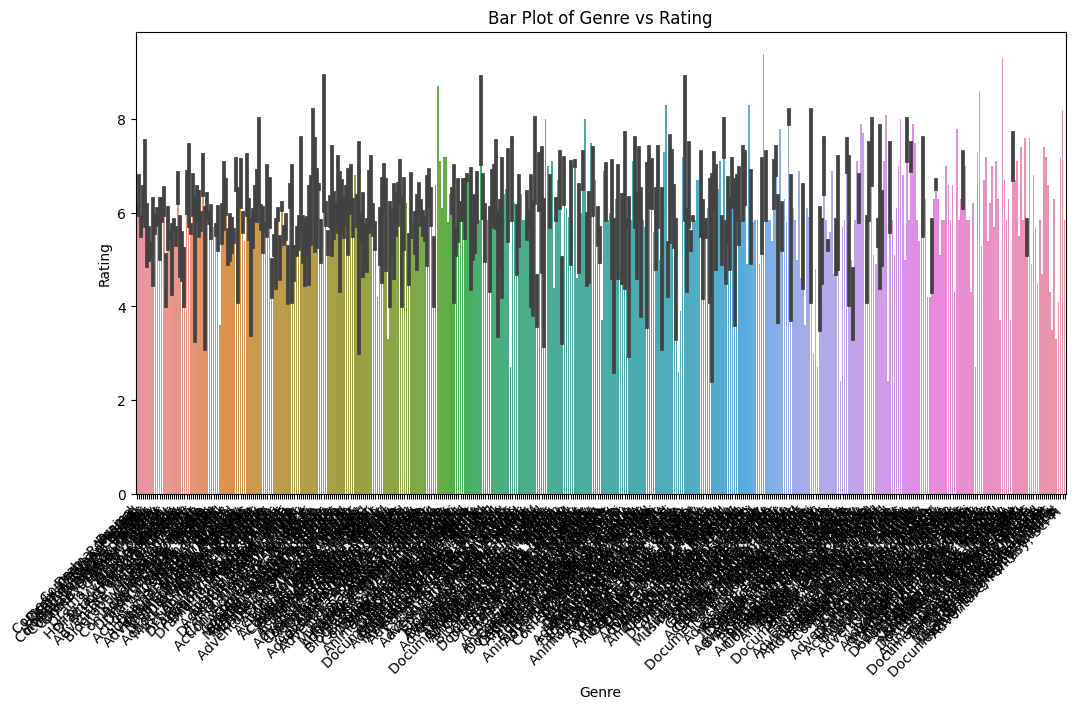

In [ ]:
# Bar plot for 'Genre' vs 'Rating'
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating', data=tda)
plt.xticks(rotation=45, ha='right')
plt.title('Bar Plot of Genre vs Rating')
plt.show()

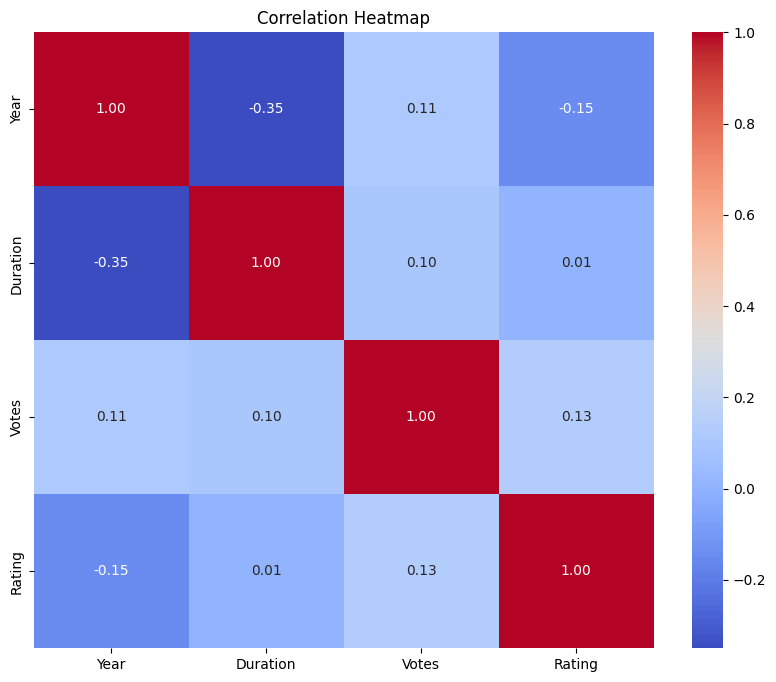

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tda[['Year', 'Duration', 'Votes', 'Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
non_numeric_columns = tda.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [ ]:
numeric_columns = tda.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = tda[numeric_columns].corr(method='spearman')
print(tda.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
tda.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(tda.isnull().sum()/tda.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    41.86
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [ ]:
# Encoding categorical variables based on mean ratings
actor1_encoding_map = tda.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = tda.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = tda.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = tda.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = tda.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

tda['actor1_encoded'] = round(tda['Actor 1'].map(actor1_encoding_map), 1)
tda['actor2_encoded'] = round(tda['Actor 2'].map(actor2_encoding_map), 1)
tda['actor3_encoded'] = round(tda['Actor 3'].map(actor3_encoding_map), 1)
tda['director_encoded'] = round(tda['Director'].map(director_encoding_map), 1)
tda['genre_encoded'] = round(tda['Genre'].map(genre_encoding_map), 1)

In [ ]:
# Drop original categorical columns
tda.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
X = tda[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = tda['Rating']
# Fill missing values in the feature matrix X with the mean
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.3567363117126811
R-squared: 0.7237317411661843


<ipython-input-30-fed6b8908b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-30-fed6b8908b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-30-fed6b8908b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

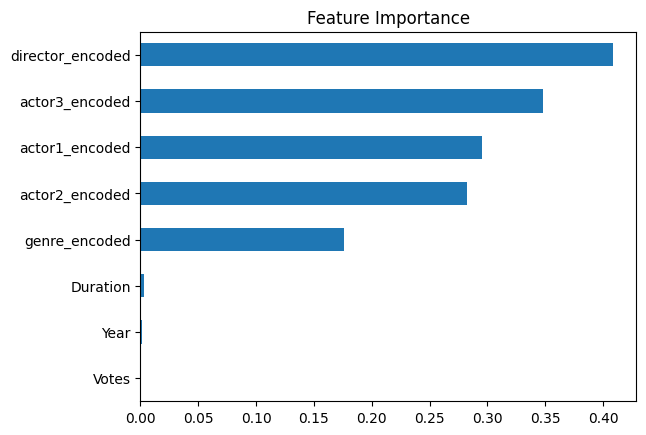

In [ ]:
Feature Importance
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values()
coefficients.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

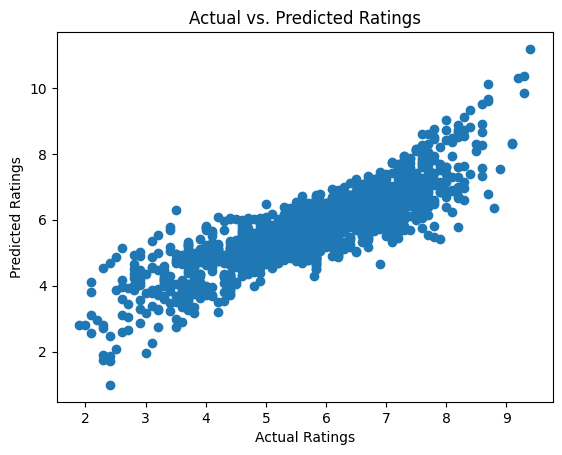

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()